# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

In [1]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import randn

In [2]:
# View Available Themes
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
px.defaults.template = "seaborn"

In [4]:
tips = px.data.tips()

tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

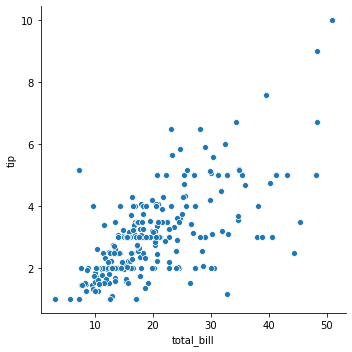

In [5]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

fig = px.scatter(tips, x="total_bill", y="tip", template='seaborn')
fig.show()

In [6]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

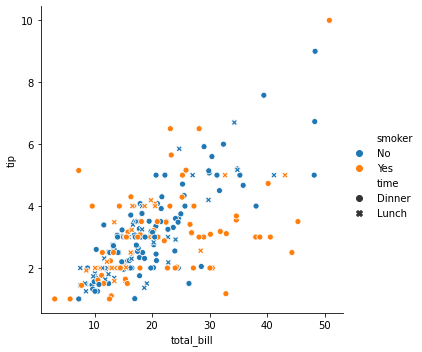

In [7]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')
px.scatter(tips, x = 'total_bill', y = 'tip', color='smoker', symbol='time')

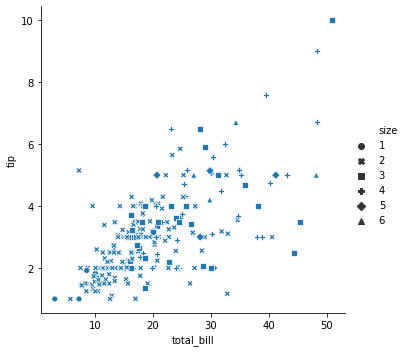

In [8]:
sns.relplot(x = 'total_bill', y = 'tip', style = 'size', data = tips)

px.scatter(tips.sort_values(by=['size']), x = 'total_bill', y = 'tip', symbol='size')

## In Plotly Express unless the data is given in sorted order of 'size' the order in legend is random

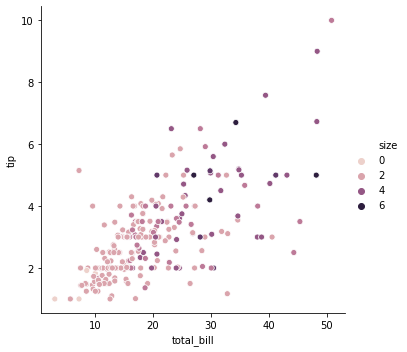

In [9]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips)

px.scatter(tips, x = 'total_bill', y = 'tip', color='size')

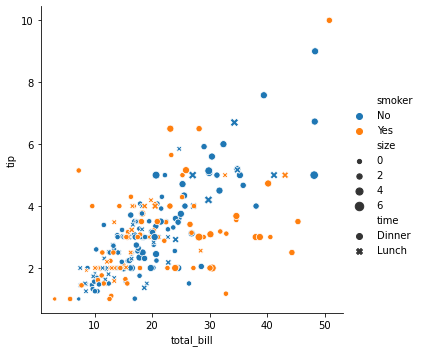

In [10]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips,hue = 'smoker', style = 'time', size = 'size')

px.scatter(tips, x = 'total_bill', y = 'tip', color='smoker', symbol='time', size='size')

## In plotly express the size is not shown in the legend

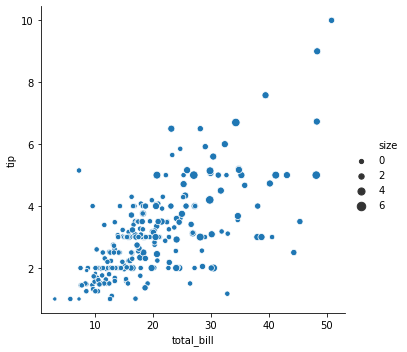

In [11]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

px.scatter(tips, x = 'total_bill', y = 'tip', size='size')

# In Plotly Express the legend 'size' is not displayed unlike Seaborn

### CHANGE OF DATA SET

In [12]:
value = randn(500).cumsum()
time = np.arange(500)

df = pd.DataFrame(dict(time=time, value=value))

df.head()

time     value
0     0  1.574851
1     1  1.063671
2     2 -0.476490
3     3 -0.020027
4     4 -1.745713

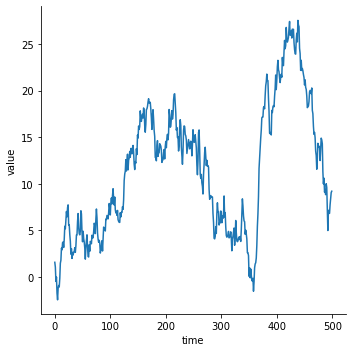

In [13]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

fig = px.line(df, x='time', y='value')
fig.show()

## Change of Dataset

In [14]:
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time', 'value'])

df.head()

time     value
0 -0.977909 -0.376797
1 -2.024556  0.913885
2 -0.768786  1.303610
3 -2.099488  1.074862
4 -1.701249  1.594889

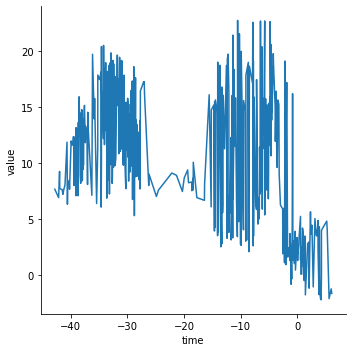

In [15]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

fig = px.line(df.sort_values(by=['time']), x='time', y='value')
fig.show()

## Plotly Express we have to give the data frame in sorted order

## Change of Dataset

In [16]:
fmri = sns.load_dataset('fmri')

fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

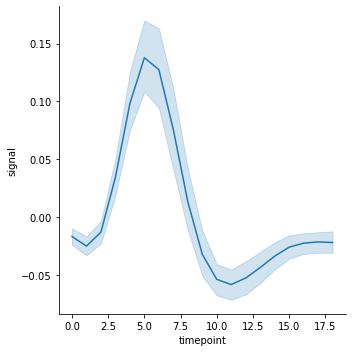

In [17]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri)

fig = px.line(fmri.sort_values(by=['timepoint']), x='timepoint', y='signal')
fig.show()

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

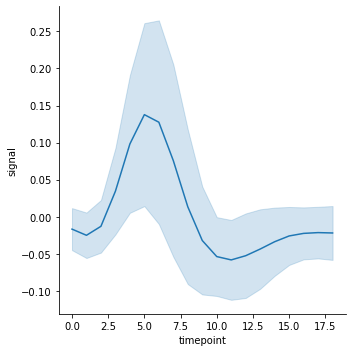

In [18]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = 'sd')

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

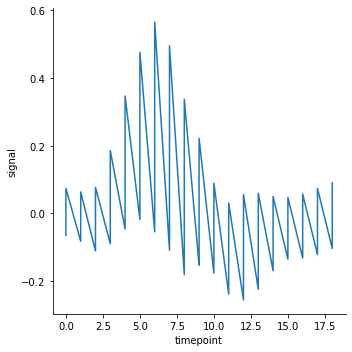

In [19]:
sns.relplot(x = 'timepoint', y = 'signal', estimator = None, kind = 'line', data = fmri)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

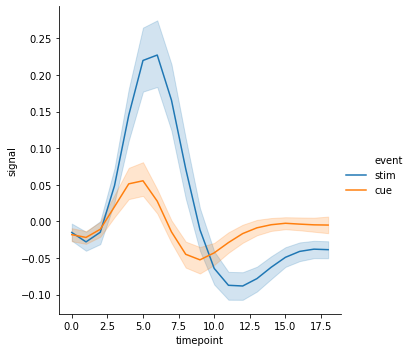

In [20]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', kind = 'line', data = fmri)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

fig = px.line(fmri.sort_values(by=['timepoint']), x='timepoint', y='signal', color='event')
fig.show()

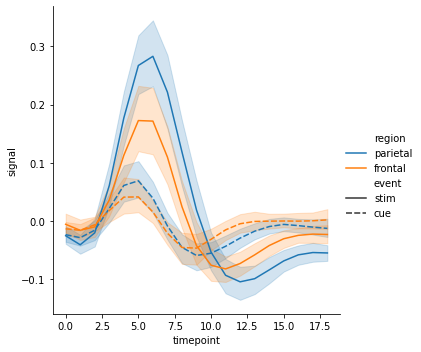

In [21]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

fig = px.line(fmri.sort_values(by=['timepoint']), x='timepoint', y='signal', color='region', line_dash='event')
fig.show()

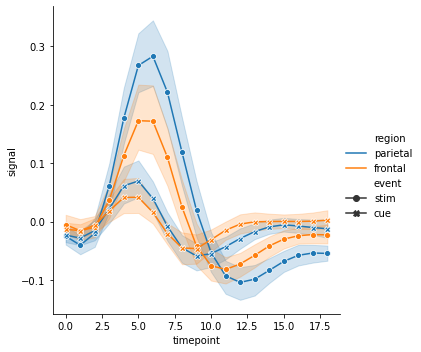

In [22]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event',
            kind = 'line', data = fmri, markers = True, dashes = False)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

fig = px.line(fmri.sort_values(by=['timepoint']), x='timepoint', y='signal', color='region', line_dash='event')
fig.update_traces(mode='lines+markers')
fig.show()

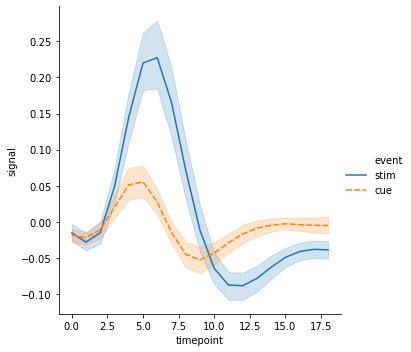

In [23]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', kind = 'line', data = fmri)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

fig = px.line(fmri.sort_values(by=['timepoint']), x='timepoint', y='signal', color='event', line_dash='event')
fig.update_traces(mode='lines+markers')
fig.show()

## Change of Dataset

In [24]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))

df.head()

time     value
0 2019-06-02 -1.021945
1 2019-06-03 -2.075436
2 2019-06-04 -0.193367
3 2019-06-05  1.491540
4 2019-06-06 -0.148687

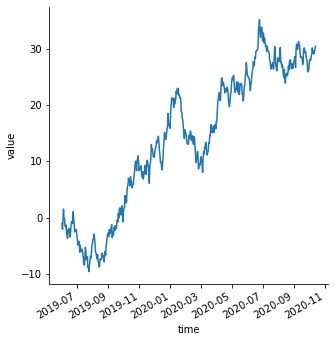

In [25]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()

fig = px.line(df, x='time', y='value')
fig.show()

## Plotly Express shows the Month by default unlike Seaborn. But have to figure out how to change the
## format like say '5 2019' instead of 'May 2019'

## Change of Dataset back to tips

In [26]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

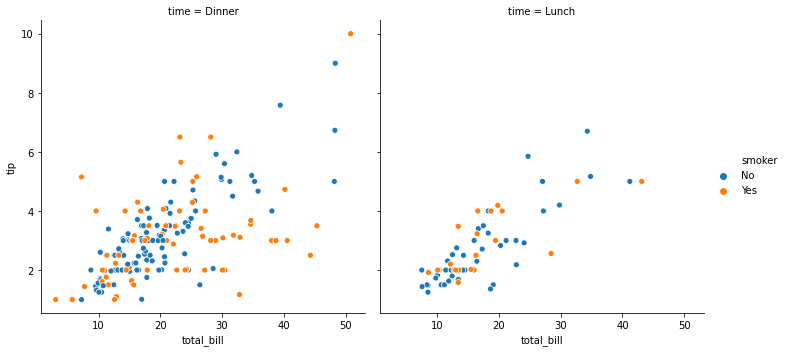

In [27]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips)

fig = px.scatter(tips, x="total_bill", y="tip", color="smoker", facet_col="time")
fig.show()

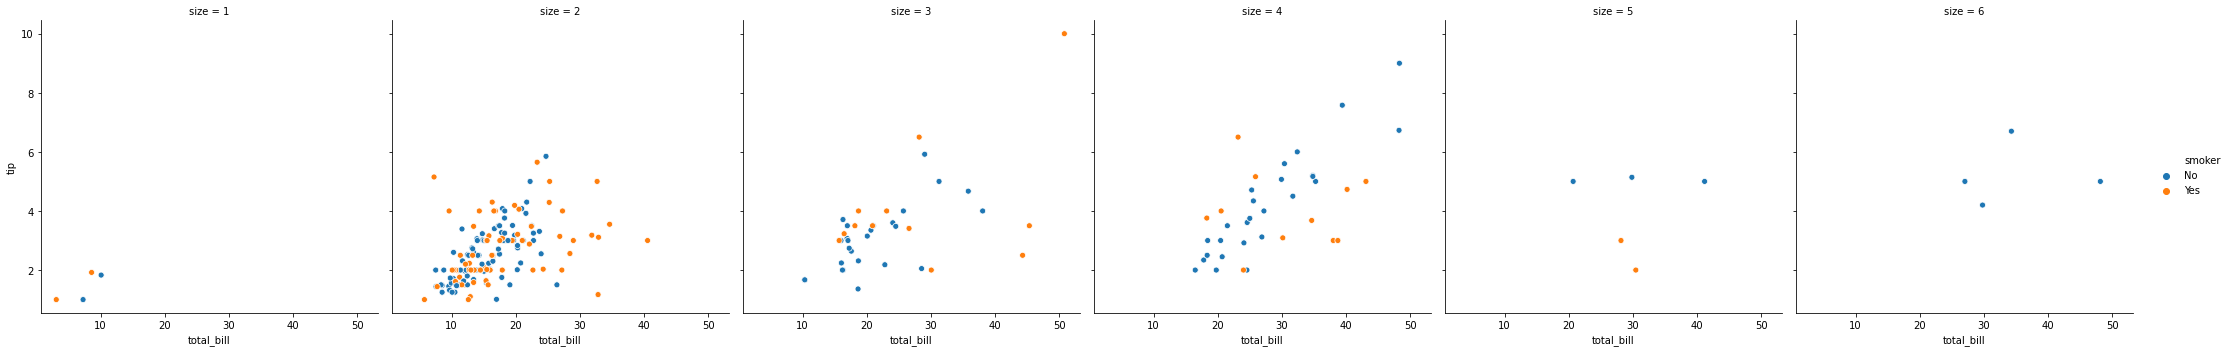

In [28]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips)

fig = px.scatter(tips.sort_values(by='size'), x="total_bill", y="tip", color="smoker", facet_col="size")
fig.show()

## In Plotly Express we have to sort the data by "size", Seaborn takes care of that by default

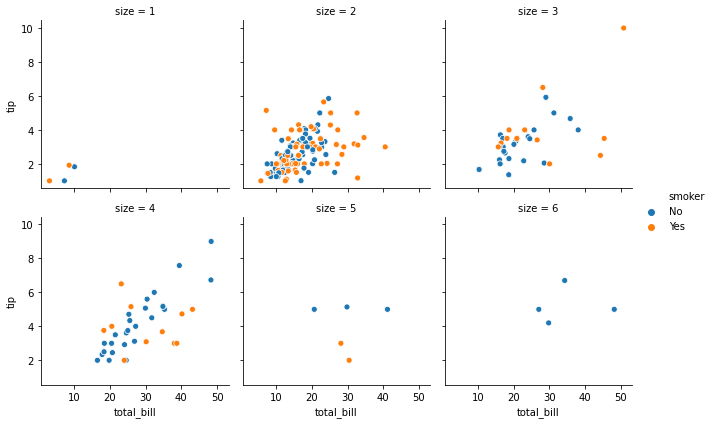

In [29]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips, col_wrap=3, height=3)

fig = px.scatter(tips.sort_values(by='size'), x="total_bill", y="tip", color="smoker",
                 facet_col="size", facet_col_wrap=3)
fig.show()

## In Plotly Express we have to sort the data by "size", Seaborn takes care of that by default

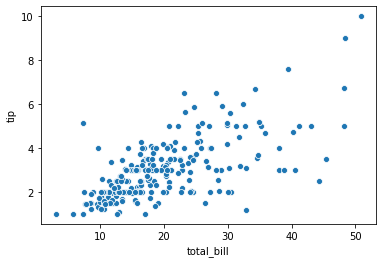

In [30]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
px.scatter(tips, x="total_bill", y='tip')

## Change of Dataset, back to fmri

In [31]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

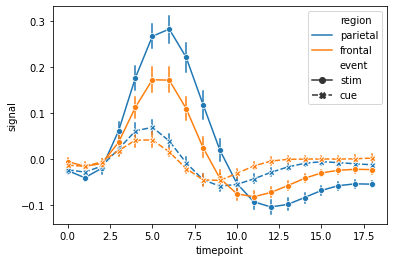

In [32]:
sns.lineplot(x = 'timepoint', y  = 'signal', style = 'event', hue = 'region', data = fmri,
             markers = True, ci = 68, err_style='bars')

fig = px.line(fmri.sort_values(by=['timepoint']), x='timepoint', y='signal', color='region', line_dash='event')
fig.update_traces(mode='lines+markers')
fig.show()

## Dont know how to do this in Plotly Express
## Check with Sudhanshu Sir.

## Change of Dataset

In [33]:
iris = px.data.iris()
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

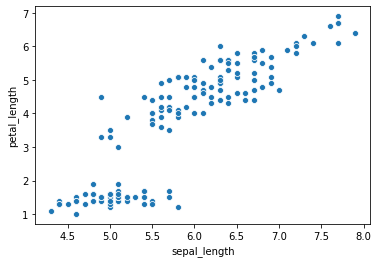

In [34]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

px.scatter(iris, x = 'sepal_length', y = 'petal_length')

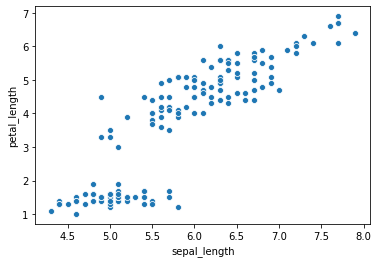

In [35]:
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])

px.scatter(x = iris['sepal_length'], y = iris['petal_length'])

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

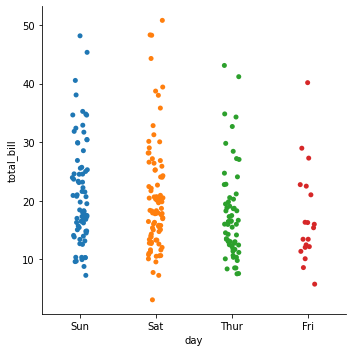

In [36]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

fig = px.strip(tips, x='day', y='total_bill', color='day')
fig.show()

## In Plotly Express we have to specifically provide the color

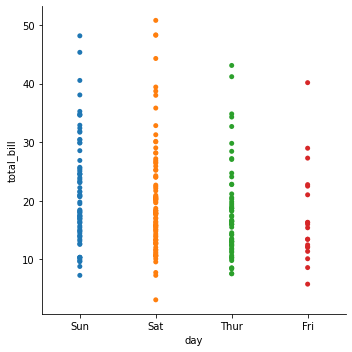

In [37]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

fig = px.scatter(tips, x='day', y='total_bill', color='day')
fig.show()
## In Plotly Express we have to specifically provide the color

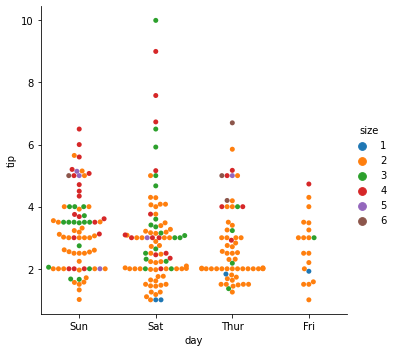

In [38]:
sns.catplot(x = 'day', y = 'tip', data = tips, kind = 'swarm', hue = 'size')

fig = px.strip(tips.sort_values(by=['size']), x='day', y='tip', color='size', stripmode='overlay',
               category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})
fig.show()

## Plotly Express not same as Seaborn - Cannot find equivalent of "swarm", 
## Also the data has to be sorted for size to come in the order 1 to 6 in legend
## The days in x axis do not follow the order in Seaborn
## Check with Sudhanshu Sir.

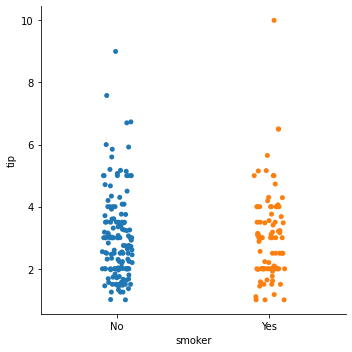

In [39]:
sns.catplot(x = 'smoker', y = 'tip', data = tips, order= ['No', 'Yes'])


fig = px.strip(tips, x='smoker', y='tip', color='smoker', category_orders={"smoker": ["No", "Yes"]})
fig.show()

## Change of Dataset to tips

In [40]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

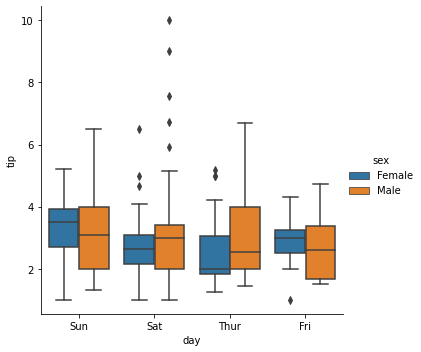

In [41]:
sns.catplot(x = 'day', y = 'tip', kind = 'box', data = tips, hue = 'sex')

px.box(tips, x = 'day', y = 'tip', color='sex')

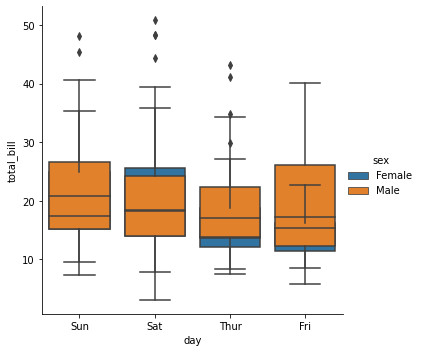

In [42]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex', dodge = False)

px.box(tips, x = 'day', y = 'tip', color='sex', boxmode='overlay')

## Change of dataset to diamonds

In [43]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

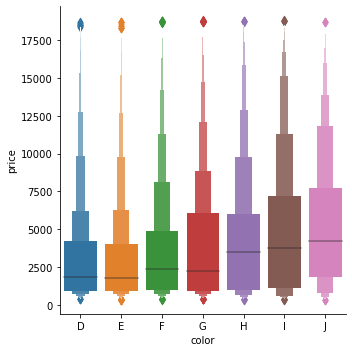

In [44]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

## Dont know how to do this in Plotly Express
## Check with Sudhanshu Sir.

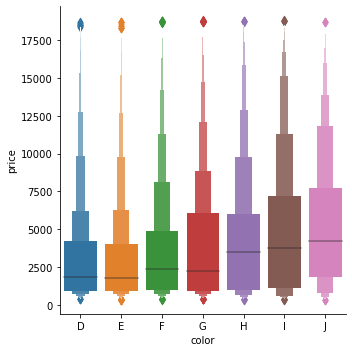

In [45]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))


## Dont know how to do this in Plotly Express
## Check with Sudhanshu Sir.

## Change of dataset to tips

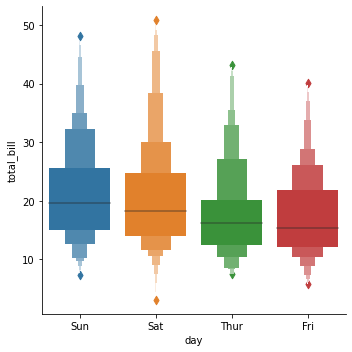

In [46]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'boxen', data = tips, dodge = False)

## Dont know how to do this in Plotly Express
## Check with Sudhanshu Sir.

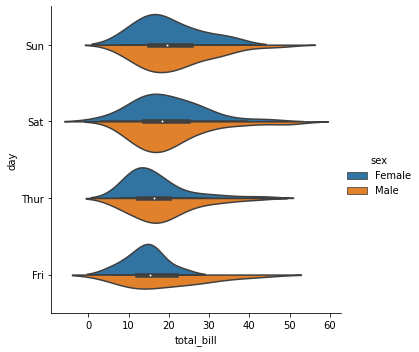

In [47]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', kind = 'violin', data = tips, split = True)

fig = px.violin(tips, x="total_bill", y='day', color='sex', violinmode='overlay')
fig.show()

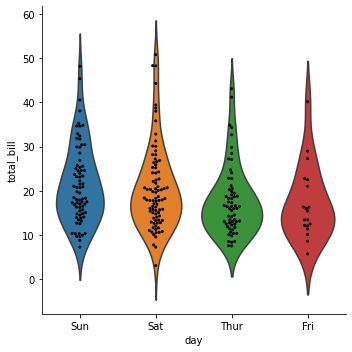

In [48]:
g = sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', inner = None, data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', color = 'k', size = 3, data = tips, ax = g.ax)

fig = px.violin(tips, x="day", y='total_bill', color='day', box=False, points='all')
fig.show()

## Dont know how to plot the scatter inside the violin with Plotly Express
## Check with Sudhanshu Sir.

## Change of Dataset to Titanic

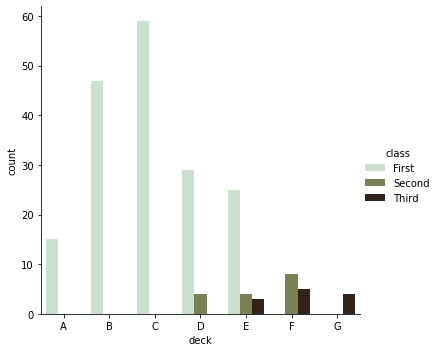

In [49]:
titanic = sns.load_dataset('titanic')

sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.95', data = titanic, hue = 'class')

fig = px.histogram(titanic, x='deck', color='class',
                   category_orders={"deck": ["A", "B", "C", "D", "E", "F", "G"],
                                    "class": ["First", "Second", "Third"]})
fig.show()

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

In [50]:
x = randn(100)

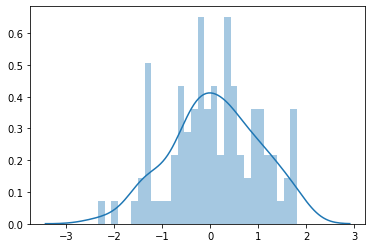

In [51]:
sns.distplot(x, kde = True, hist = True, rug = False, bins= 30)

hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, show_rug=False)
fig.update_traces(nbinsx=30, autobinx=True, selector={'type':'histogram'}) 
fig.show()

## Change of Dataset to tips

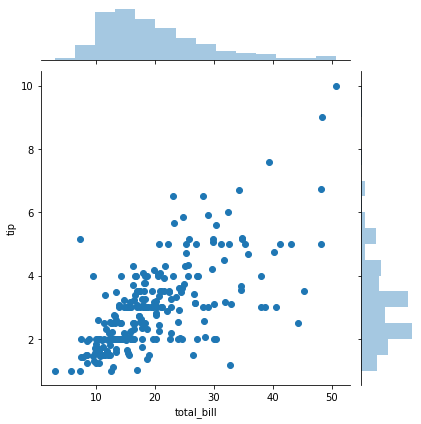

In [52]:
sns.jointplot(data=tips, x='total_bill', y='tip')

fig = px.scatter(tips, x='total_bill', y='tip', marginal_y="histogram", marginal_x="histogram")
fig.show()

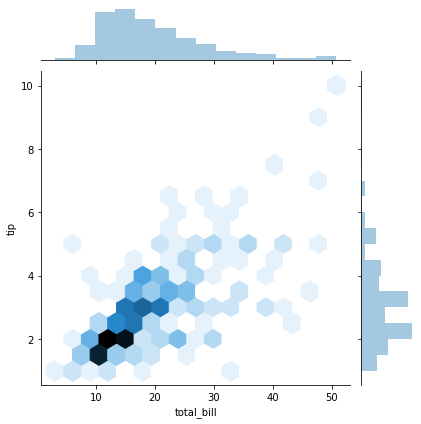

In [53]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind = 'hex')

## There is no straight forward way in Plotly Express to support this
## Check with Sudhanshu Sir.

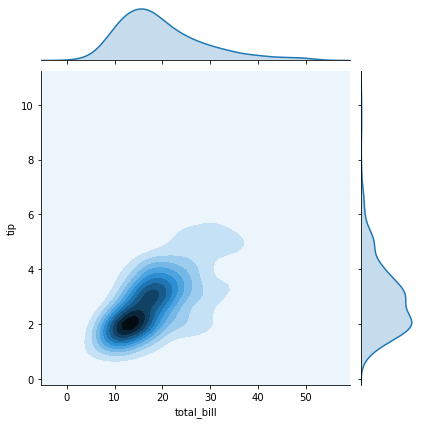

In [54]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind = 'kde')

fig = go.Figure()

fig.add_trace(go.Histogram2dContour(x=tips['total_bill'], y=tips['tip']))

fig.add_trace(go.Scatter(
        x=tips['total_bill'], y=tips['tip'], 
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = 'rgba(0,0,0,0.3)',
            size = 3
        )
    ))

fig.add_trace(go.Histogram(
        y=tips['tip'], 
        xaxis = 'x2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))

fig.add_trace(go.Histogram(
        x=tips['total_bill'],
        yaxis = 'y2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))


fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
        height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig.show()

# Using Plotly API's and not Plotly Express?
# Taken from https://www.kaggle.com/subinium/road-to-viz-expert-2-plotly-seaborn
## Check with Sudhanshu Sir.

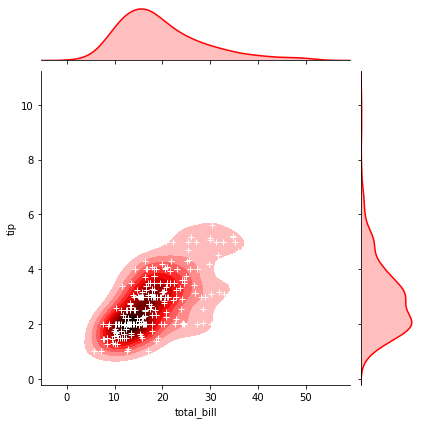

In [55]:
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind = 'kde', color = 'r')
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

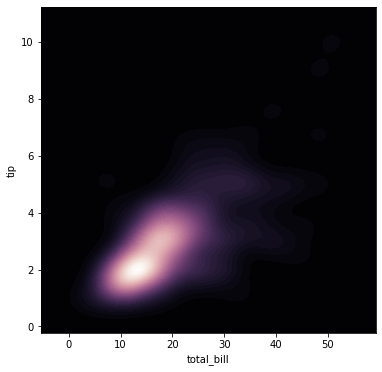

In [56]:
f, ax = plt.subplots(figsize = (6,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse= True)
sns.kdeplot(tips['total_bill'], tips['tip'], cmap = cmap, n_levels=60, shade=True)

## Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

## Change of Dataset to IRIS

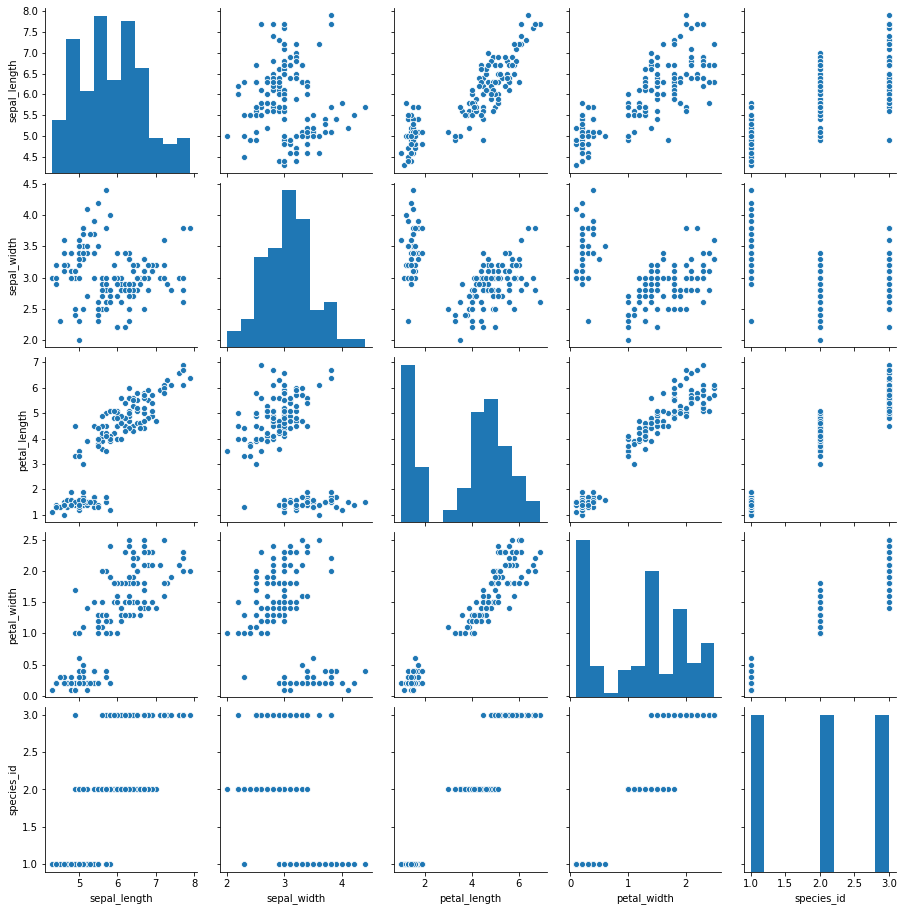

In [57]:
sns.pairplot(iris)

fig = px.scatter_matrix(iris, 
                        dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                        color="species")
fig.show()

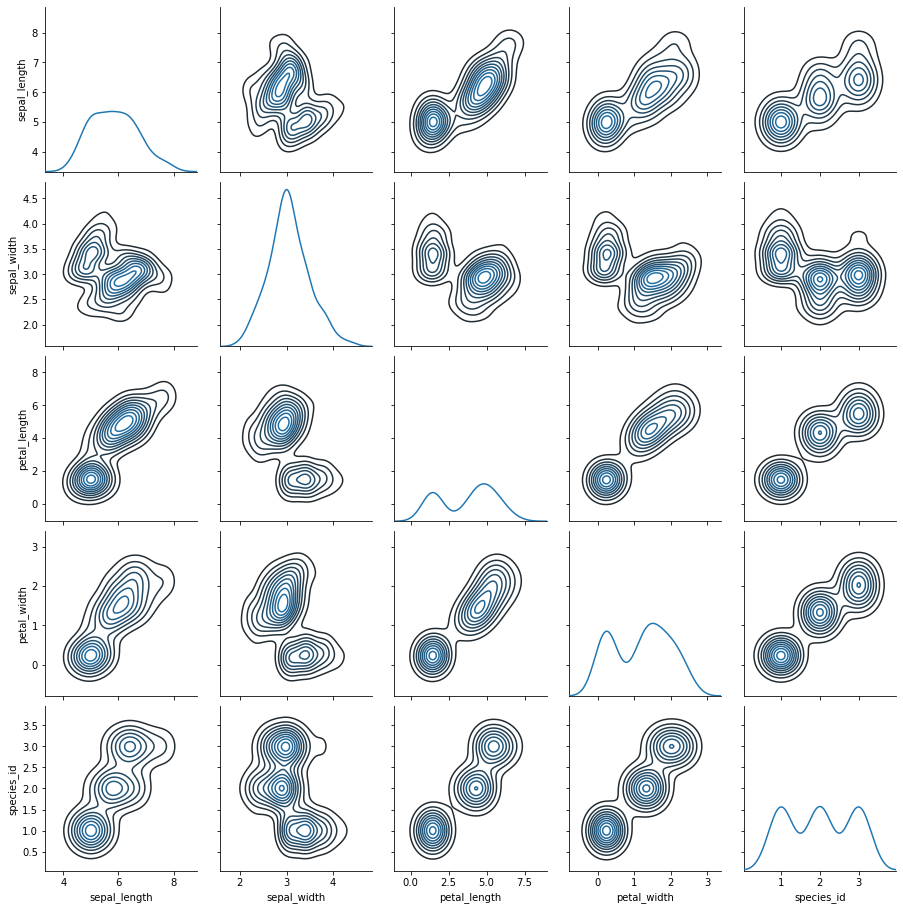

In [58]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

# Dont know how to do this with Plotly Express
## Check with Sudhanshu Sir.

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

In [59]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

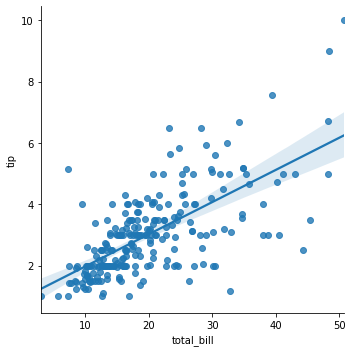

In [60]:
sns.lmplot(x = 'total_bill', y= 'tip', data = tips)

fig = px.scatter(tips, x="total_bill", y="tip", trendline="ols")
fig.show()

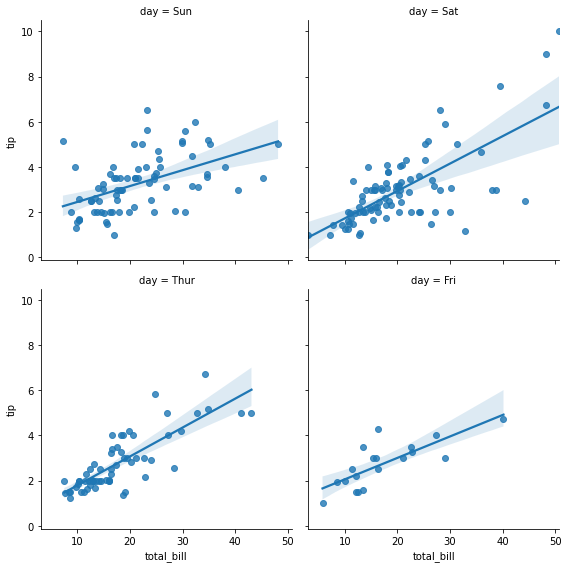

In [61]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', col_wrap=2, height = 4)

fig = px.scatter(tips, x="total_bill", y="tip",  facet_col="day", facet_col_wrap=2, trendline="ols",
                trendline_color_override='#d8576b')
fig.show()